<a href="https://colab.research.google.com/github/Anshuman22coder/ML-projects/blob/main/Digit_Classification_USING_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# multi class classification
# using the mnist dataset
# usin ANN- flattening of the image pixels as the first layer ..

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape  # X_train contains 60000  datas of images and each image is of the shape 28 by 28 pixels and printing X_train[0] will just print the 1st image ...and note that all cells contains pixels

(60000, 28, 28)

In [5]:
y_train  # contains 60000 nos .. telling which data is image is what in terms of  numbers ,,and so onn...

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

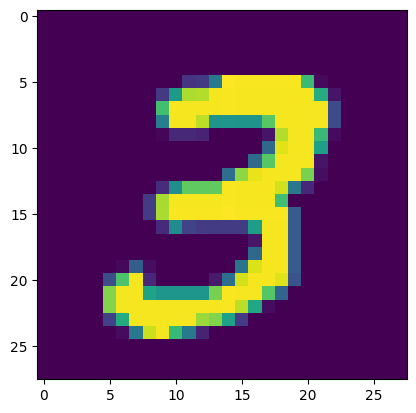

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [7]:
# training an ANN

# 0->255------>>>>>>(0--->1) for convergence
X_train=X_train/255
X_test=X_test/255

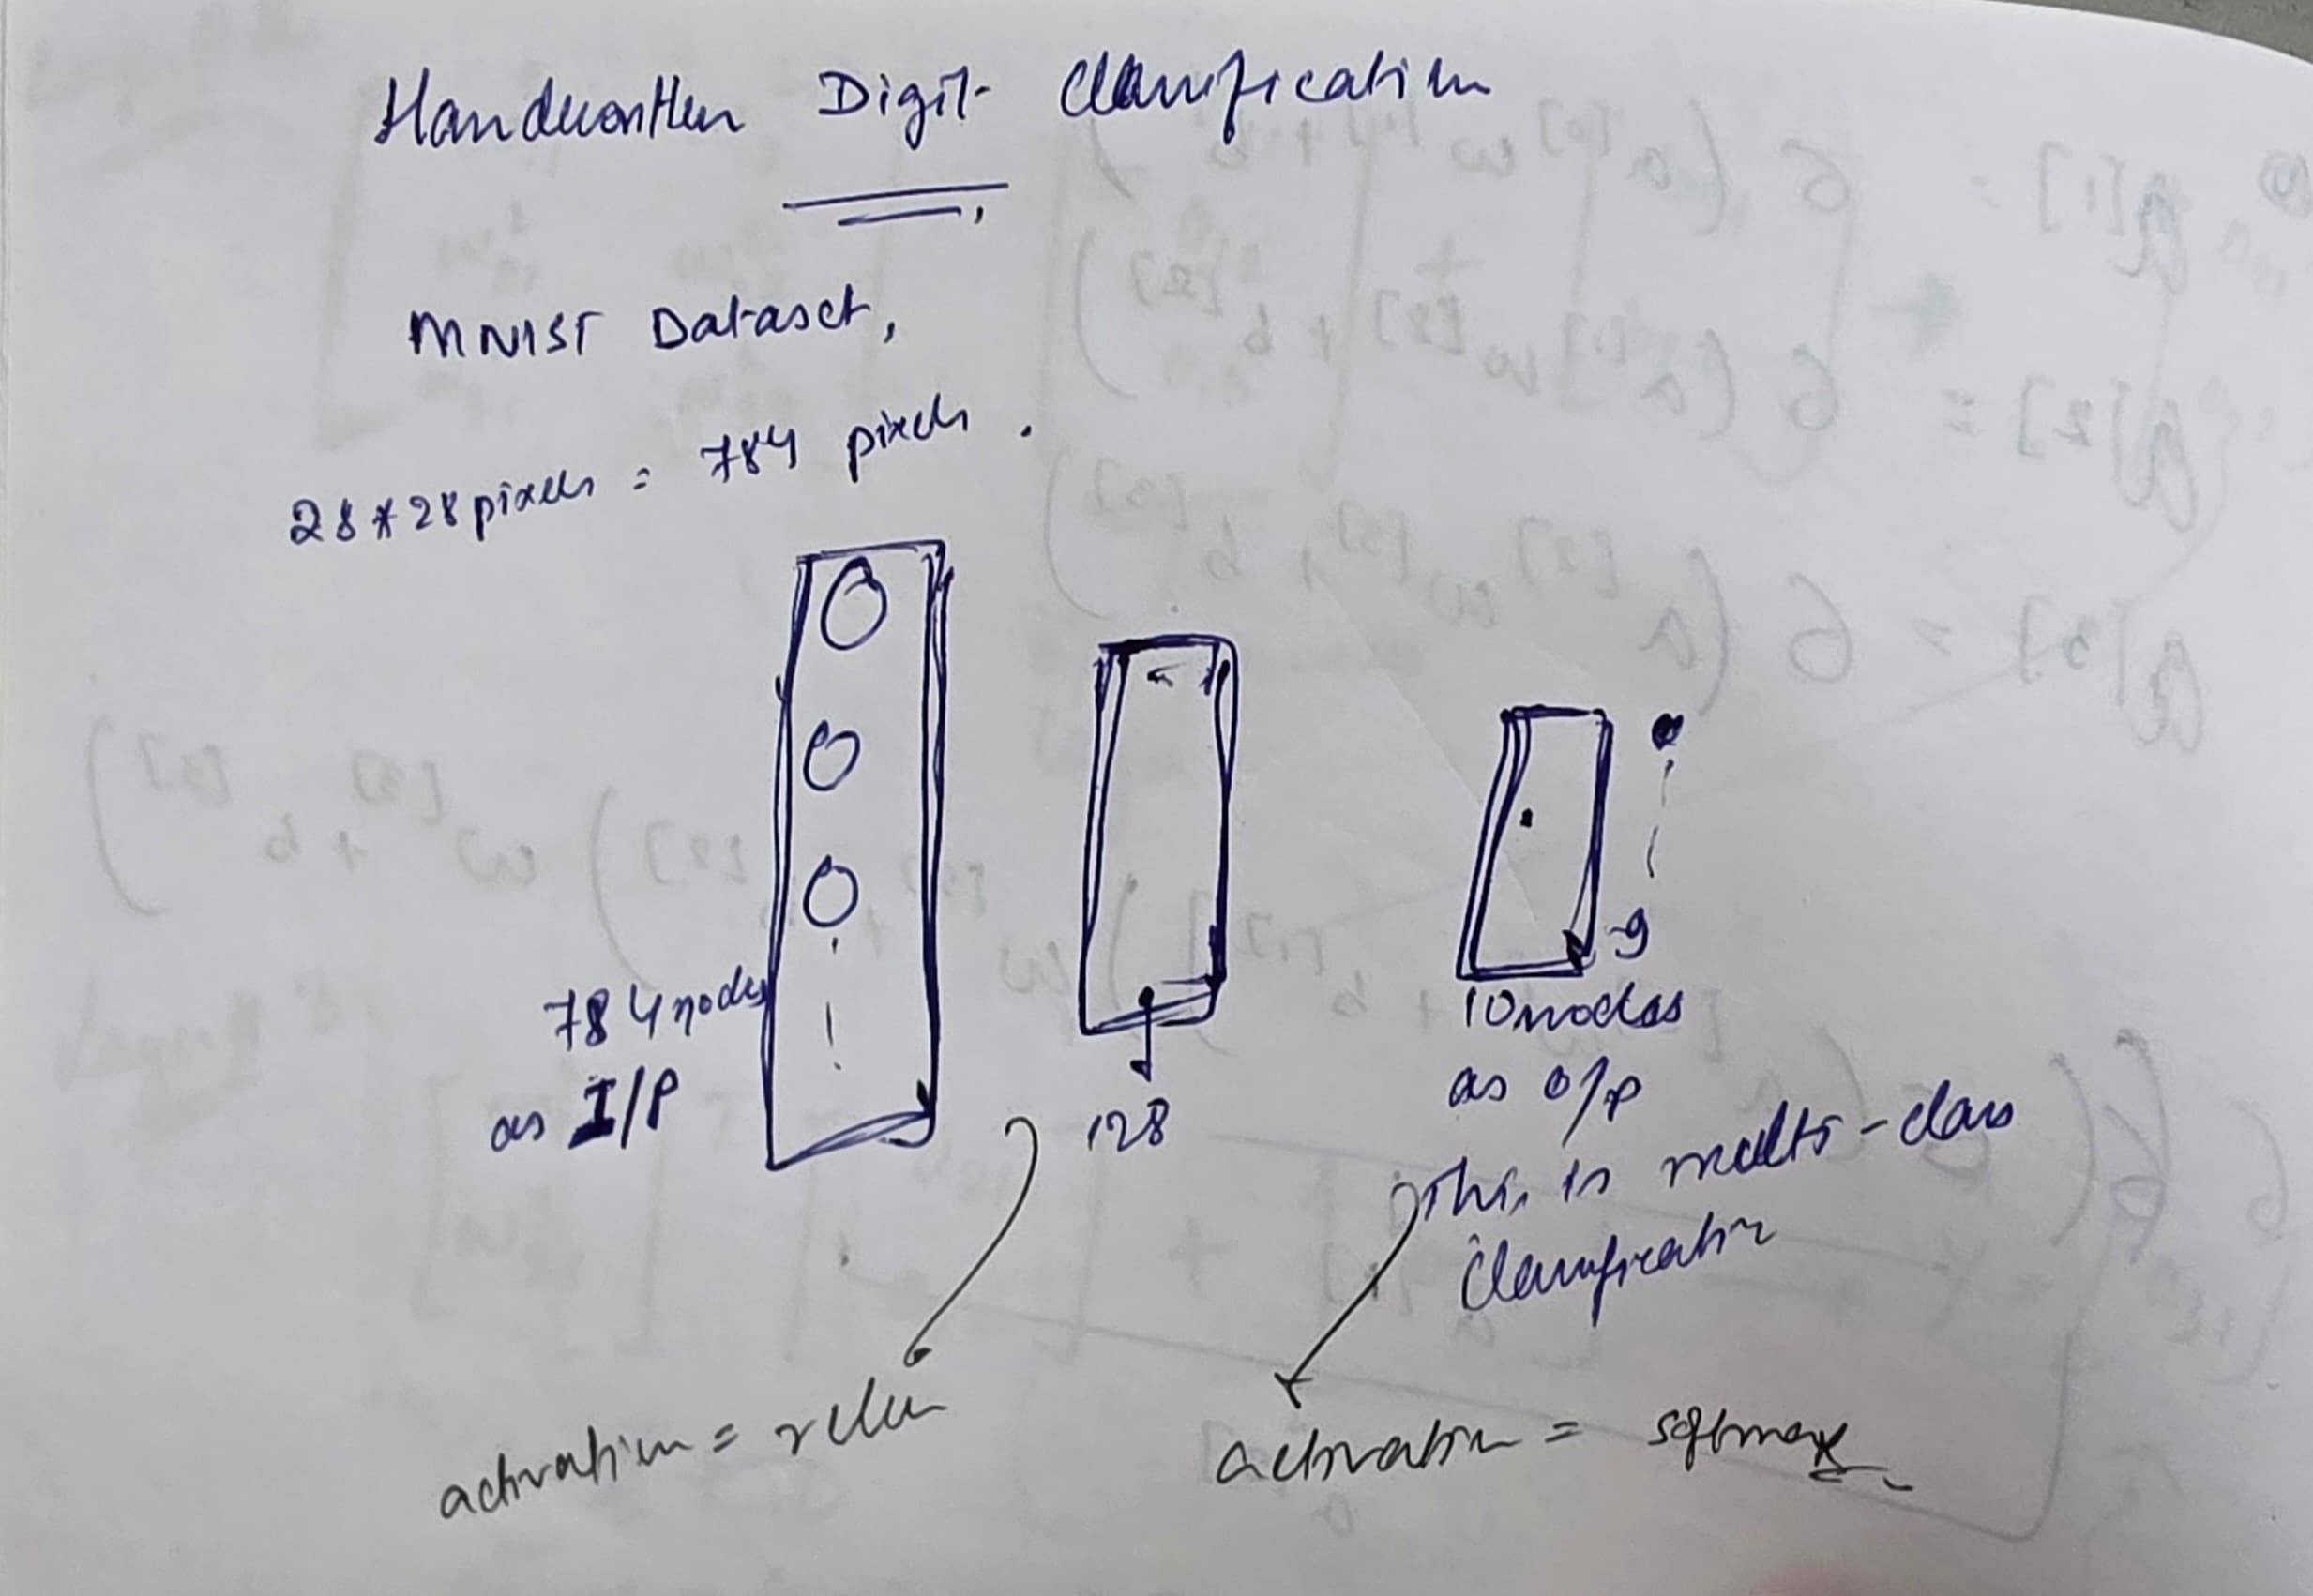

In [8]:
# architecture

model=Sequential()
model.add(Flatten(input_shape=(28,28)))  # 2d to 1-d  # every pixel = 1 node in this layer ..  # this layer would not be required if we use CNN as there we do not have to use flattening of images..
model.add(Dense(128,activation="relu"))  # 2nd layer or 1st hidden layer added .
model.add(Dense(10,activation="softmax"))  # output layer  ,, always remember for multi class classification ,,last layer is always having actiavtion="softmax"

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])  # metrics define what what mercs we want to track..

In [10]:
#early stopping===when accuaracy is not at all incraesing then do early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,#suppose val_loss_best=0.5 and val_loss_now=0.49, now it is an improvement as >=0.0001
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
history=model.fit(X_train, y_train, epochs=10,validation_split=0.2,batch_size=10,callbacks=early_stopping)


Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8849 - loss: 0.3927 - val_accuracy: 0.9651 - val_loss: 0.1246
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9672 - loss: 0.1071 - val_accuracy: 0.9668 - val_loss: 0.1084
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9789 - loss: 0.0698 - val_accuracy: 0.9668 - val_loss: 0.1153
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9843 - loss: 0.0478 - val_accuracy: 0.9718 - val_loss: 0.1014
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9721 - val_loss: 0.0995
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9748 - val_loss: 0.0939
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9922 - loss: 0.0222 - val_accuracy: 0.9759 - val_loss: 0.0955
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9933 - loss: 0

In [11]:
y_prob=model.predict(X_test)  # this is to predict and at each row, we get the probabilties of 0-9 and after this step we will require to get the max probabilty whose..
print(y_prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[2.3708211e-13 3.5825055e-14 1.9953879e-10 ... 9.9999994e-01
  5.9247725e-11 1.4672803e-09]
 [6.5668426e-17 5.8870993e-09 9.9999994e-01 ... 1.7546696e-26
  2.9705325e-15 6.4385565e-23]
 [1.6756571e-08 9.9999315e-01 3.0967929e-06 ... 1.3058086e-06
  2.3002701e-06 5.4972604e-10]
 ...
 [8.3579165e-18 8.2783754e-16 9.0792964e-16 ... 8.4976790e-08
  3.0791108e-12 1.4112560e-08]
 [3.8306578e-15 6.1526086e-21 9.4244451e-19 ... 1.7642448e-14
  2.3843718e-09 7.6729552e-20]
 [1.4297983e-13 1.5363601e-16 1.0725236e-16 ... 3.0524037e-21
  6.4210205e-15 4.8231585e-15]]


In [12]:
y_pred=y_prob.argmax(axis=1)  # prob to noss..
print(y_pred)

[7 2 1 ... 4 5 6]


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764

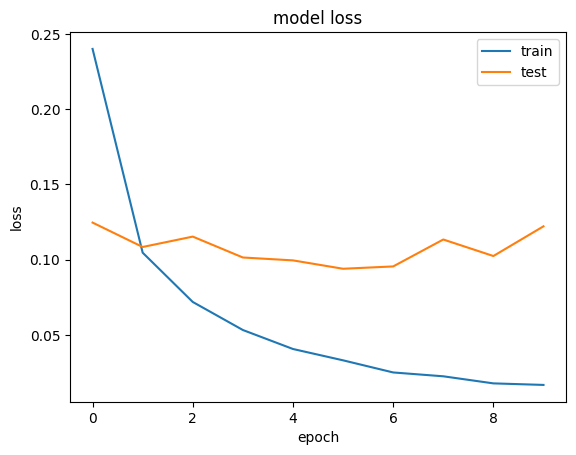

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper right")
plt.show()

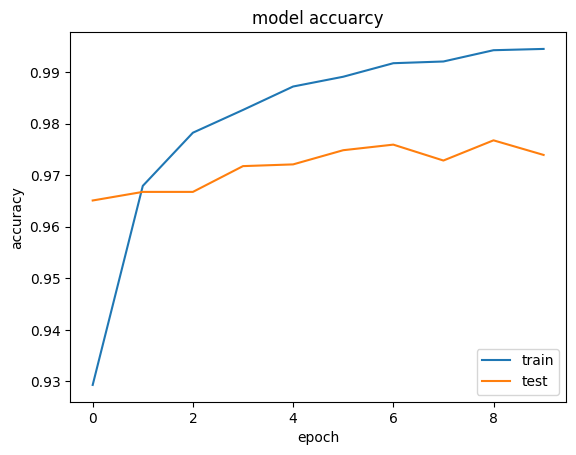

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuarcy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

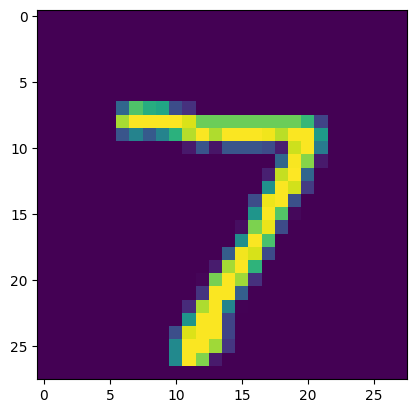

In [16]:
#testing...

plt.imshow(X_test[0])


In [17]:
y_prob=model.predict(X_test[0].reshape( 1,28,28)).argmax(axis=1) #axis=1 is row-wise
print(y_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[7]


In [18]:
## as we can see the image of X_test[0] is showing to be 7 and the answer, the prediction came 7 too